In [13]:
data_file = open("mnist_dataset/mnist_train_100.csv", 'r')

In [14]:
data_list = data_file.readlines()

In [15]:
data_file.close()

In [16]:
data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
all_values = data_list[1].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28, 28))

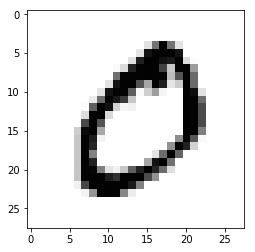

In [23]:
plt.imshow(image_array, cmap='Greys', interpolation='None')

In [26]:
scaled_input = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

In [27]:
scaled_input

array([0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01   

In [28]:
onodes = 10
targets = np.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99

In [29]:
targets

array([0.99, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

In [37]:
import numpy as np
import scipy.special

# neural network class definition
class Neural_Network():
    
    # initialize the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrics, wih and who
        # weights inside the arrays are w_i_j, where link is from node_i to node_j in the next layer
        # w11, w21
        # w12, w22 etc
        self.wih = np.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
    
        # learning rate
        self.lr = learningrate
                    
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    
    # train the neural network
    def train(self, inputs_list, targets_list):
        #convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T

        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layers
        final_outputs = self.activation_function(final_inputs)

        # error is the (target - actual)
        output_errors = targets - final_outputs
        
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = np.dot(self.who.T, output_errors)
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        
        # update the weights for the links between the hidden and output layers
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        
        pass

                    
                    
    # query the neural network
    def query(self, inputs_list):
        
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        
           
        #calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)          
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
                    
        return final_outputs  

In [38]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

learning_rate = 0.3

In [39]:
n = Neural_Network(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [40]:
training_data_file = open("mnist_dataset/mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [41]:
for record in training_data_list:
    all_values = record.split(',')
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    targets = np.zeros(output_nodes) + 0.01
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)

In [43]:
test_data_file = open("mnist_dataset/mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [44]:
all_values = test_data_list[0].split(',')

In [45]:
input_query = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

In [46]:
n.query(input_query)

array([[0.11558183],
       [0.01252193],
       [0.02256009],
       [0.09681449],
       [0.08289528],
       [0.06741483],
       [0.00193176],
       [0.9134993 ],
       [0.05599914],
       [0.01784521]])

In [50]:
scorecard = []

In [51]:
for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    print(correct_label, " is the correct label")
    
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    
    label = np.argmax(outputs)
    print(label, " is network's answer")
    
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass

7  is the correct label
7  is network's answer
2  is the correct label
0  is network's answer
1  is the correct label
1  is network's answer
0  is the correct label
0  is network's answer
4  is the correct label
4  is network's answer
1  is the correct label
1  is network's answer
4  is the correct label
4  is network's answer
9  is the correct label
4  is network's answer
5  is the correct label
4  is network's answer
9  is the correct label
7  is network's answer


In [53]:
print(scorecard)

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]


In [54]:
scorecard_array = np.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.6
